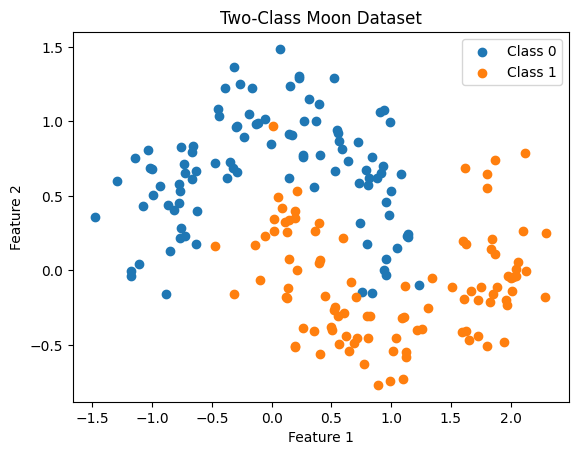

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Plot the data
plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1")

plt.title("Two-Class Moon Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [5]:
# =====================
# Decision Boundary Plot
# =====================
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=40)
    plt.title(title)
    plt.show()


Linear SVM accuracy: 0.85


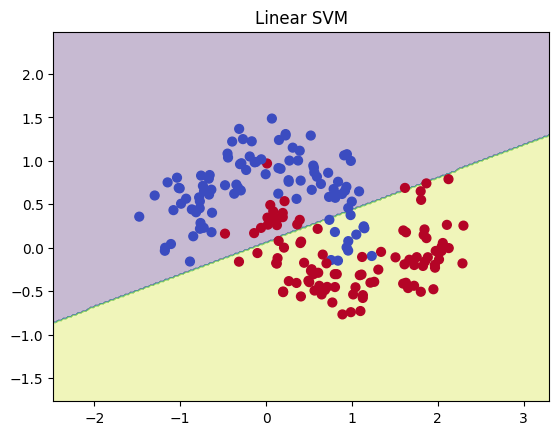

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# =====================
# Dataset
# =====================
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)



model_svm_linear = SVC(kernel='linear')
model_svm_linear.fit(X, y)

print("Linear SVM accuracy:", model_svm_linear.score(X, y))

plot_decision_boundary(model_svm_linear, X, y, "Linear SVM")




RBF SVM accuracy: 0.965


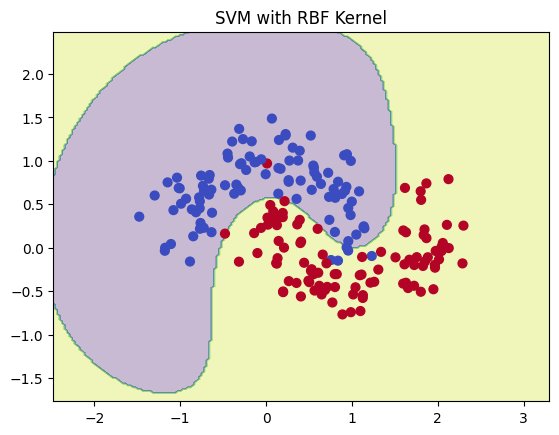

In [7]:

model_svm_rbf = SVC(kernel='rbf', gamma=1)
model_svm_rbf.fit(X, y)

print("RBF SVM accuracy:", model_svm_rbf.score(X, y))

plot_decision_boundary(model_svm_rbf, X, y, "SVM with RBF Kernel")


Epoch 0 | Loss: 0.9356
Epoch 100 | Loss: 0.8053
Epoch 200 | Loss: 0.8052
Epoch 300 | Loss: 0.8052
Epoch 400 | Loss: 0.8052
Epoch 500 | Loss: 0.8052
Epoch 600 | Loss: 0.8052
Epoch 700 | Loss: 0.8052
Epoch 800 | Loss: 0.8052
Epoch 900 | Loss: 0.8052
Epoch 1000 | Loss: 0.8052
Epoch 1100 | Loss: 0.8052
Epoch 1200 | Loss: 0.8052
Epoch 1300 | Loss: 0.8052
Epoch 1400 | Loss: 0.8052
Epoch 1500 | Loss: 0.8052
Epoch 1600 | Loss: 0.8052
Epoch 1700 | Loss: 0.8052
Epoch 1800 | Loss: 0.8052
Epoch 1900 | Loss: 0.8052
Linear SVM (from scratch) accuracy: 0.78


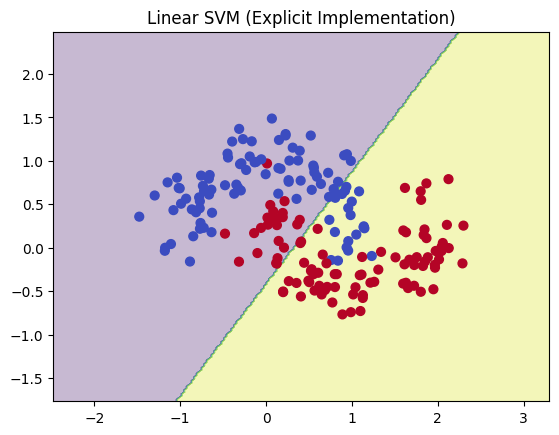

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# =====================
# Dataset
# =====================
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Convert labels {0,1} → {-1,1}
y = np.where(y == 0, -1, 1)

# =====================
# SVM From Scratch
# =====================
class LinearSVM:
    def __init__(self, lr=0.01, C=1.0, epochs=500):
        self.lr = lr
        self.C = C
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0

        for epoch in range(self.epochs):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X[i], self.w) + self.b) >= 1

                if condition:
                    # Only regularization term
                    dw = self.w
                    db = 0
                else:
                    # Regularization + hinge loss gradient
                    dw = self.w - self.C * y[i] * X[i]
                    db = -self.C * y[i]

                self.w -= self.lr * dw
                self.b -= self.lr * db

            if epoch % 100 == 0:
                loss = self.compute_loss(X, y)
                print(f"Epoch {epoch} | Loss: {loss:.4f}")

    def compute_loss(self, X, y):
        distances = 1 - y * (X @ self.w + self.b)
        distances = np.maximum(0, distances)
        hinge_loss = self.C * np.mean(distances)
        reg_loss = 0.5 * np.dot(self.w, self.w)
        return reg_loss + hinge_loss

    def predict(self, X):
        linear_output = X @ self.w + self.b
        return np.sign(linear_output)

# =====================
# Train Linear SVM
# =====================
svm = LinearSVM(lr=0.001, C=1.0, epochs=2000)
svm.fit(X, y)

y_pred = svm.predict(X)
accuracy = np.mean(y_pred == y)

print("Linear SVM (from scratch) accuracy:", accuracy)



plot_decision_boundary(svm, X, y, "Linear SVM (Explicit Implementation)")


Number of support vectors: 48
RBF SVM (from scratch) accuracy: 0.97


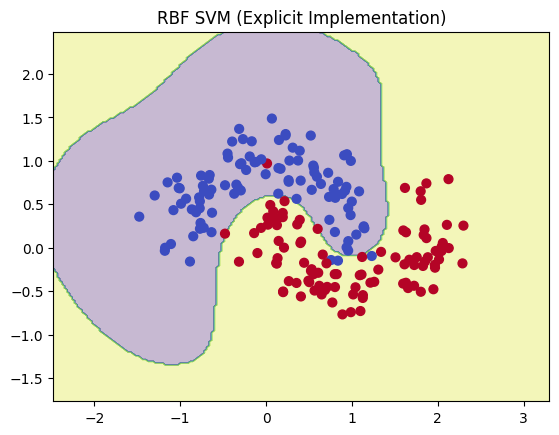

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# =====================
# Dataset
# =====================
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Convert labels {0,1} → {-1,1}
y = np.where(y == 0, -1, 1)

# =====================
# RBF Kernel
# =====================
def rbf_kernel(x1, x2, gamma):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

# =====================
# SVM with SMO (simplified)
# =====================
class RBFSVM:
    def __init__(self, C=1.0, gamma=1.0, tol=1e-3, max_passes=5):
        self.C = C
        self.gamma = gamma
        self.tol = tol
        self.max_passes = max_passes

    def fit(self, X, y):
        n_samples, _ = X.shape
        self.X = X
        self.y = y
        self.alpha = np.zeros(n_samples)
        self.b = 0

        passes = 0

        while passes < self.max_passes:
            num_changed = 0

            for i in range(n_samples):
                Ei = self._predict_row(X[i]) - y[i]

                if ((y[i]*Ei < -self.tol and self.alpha[i] < self.C) or
                    (y[i]*Ei > self.tol and self.alpha[i] > 0)):

                    j = np.random.randint(0, n_samples)
                    while j == i:
                        j = np.random.randint(0, n_samples)

                    Ej = self._predict_row(X[j]) - y[j]

                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]

                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])

                    if L == H:
                        continue

                    Kii = rbf_kernel(X[i], X[i], self.gamma)
                    Kjj = rbf_kernel(X[j], X[j], self.gamma)
                    Kij = rbf_kernel(X[i], X[j], self.gamma)

                    eta = 2*Kij - Kii - Kjj
                    if eta >= 0:
                        continue

                    self.alpha[j] -= y[j] * (Ei - Ej) / eta
                    self.alpha[j] = np.clip(self.alpha[j], L, H)

                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    self.alpha[i] += y[i]*y[j]*(alpha_j_old - self.alpha[j])

                    b1 = self.b - Ei \
                        - y[i]*(self.alpha[i]-alpha_i_old)*Kii \
                        - y[j]*(self.alpha[j]-alpha_j_old)*Kij

                    b2 = self.b - Ej \
                        - y[i]*(self.alpha[i]-alpha_i_old)*Kij \
                        - y[j]*(self.alpha[j]-alpha_j_old)*Kjj

                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2)/2

                    num_changed += 1

            if num_changed == 0:
                passes += 1
            else:
                passes = 0

        # Store support vectors
        self.support_vectors = self.X[self.alpha > 1e-5]
        print("Number of support vectors:", len(self.support_vectors))

    def _predict_row(self, x):
        result = 0
        for i in range(len(self.X)):
            result += self.alpha[i] * self.y[i] * \
                      rbf_kernel(self.X[i], x, self.gamma)
        return result + self.b

    def predict(self, X):
        return np.sign(np.array([self._predict_row(x) for x in X]))

# =====================
# Train RBF SVM
# =====================
svm_rbf = RBFSVM(C=1.0, gamma=2.0)
svm_rbf.fit(X, y)

y_pred = svm_rbf.predict(X)
accuracy = np.mean(y_pred == y)

print("RBF SVM (from scratch) accuracy:", accuracy)



plot_decision_boundary(svm_rbf, X, y, "RBF SVM (Explicit Implementation)")
